# 탐색 준비

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import WhitespaceTokenizer
import urllib
from wordcloud import WordCloud

In [2]:
#  맷플롯립 전역폰트설정 해놓깅
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = "AppleGothic"

In [3]:
# 데이터 읽기
df = pd.read_csv('/Users/sky/class_python/3.EDA/jobkorea_saramin_recruit.csv', index_col=0)
df.head(3)

,resource,company,duty,career,degree,work_place,work_type,category,link,info
0,jobkorea,디휴브(DEHUV),[디휴브] 개발자 부문채용,신입·경력,학력무관,경기 고양시,정규직,"['반응형 웹, 백엔드, 풀스택, 하이브리드 앱, 소프트웨어개발, BigData, ...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/d...
1,jobkorea,㈜레미유코스메틱,브랜드 디자이너 / MD / (카페)쇼룸 매니저 채용,경력,학력무관,서울 성동구,정규직 외\n,"['화장품, 마케팅, 마케팅기획, 브랜딩, 프로모션, 상품기획, 신상품개발, 온라인...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/l...
2,jobkorea,㈜순진,마케팅 담당자 및 상품기획/MD 경력직 채용,경력2년↑,고졸↑,서울 광진구,정규직,"['영상편집, 포토샵, 제품기획, 광고기획, 마케팅, 마케팅기획, 바이럴마케팅, 브...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/s...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47645 entries, 0 to 18372
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   resource    47645 non-null  object
 1   company     47645 non-null  object
 2   duty        47645 non-null  object
 3   career      47645 non-null  object
 4   degree      47645 non-null  object
 5   work_place  47645 non-null  object
 6   work_type   47645 non-null  object
 7   category    47645 non-null  object
 8   link        47645 non-null  object
 9   info        47645 non-null  object
dtypes: object(10)
memory usage: 4.0+ MB


In [5]:
df.isna().sum()

resource      0
company       0
duty          0
career        0
degree        0
work_place    0
work_type     0
category      0
link          0
info          0
dtype: int64

# 컬럼별 고유값 개수 확인하깅

In [13]:
df['company'].value_counts()

㈜엔씨소프트                158
컴퓨터수리                 155
㈜조인아이티                117
세방정보시스템                85
이수정보㈜                  74
                     ... 
AUTHENTIC WARDROBE      1
토이멀티샵                   1
셀러 이츠                   1
픽스플랜                    1
(주)파폼                   1
Name: company, Length: 25206, dtype: int64

In [15]:
df['duty'].value_counts()

백엔드 개발자                         38
프론트엔드 개발자                       37
웹디자이너 모집                        25
웹디자이너 채용                        23
안드로이드 개발자                       17
                                ..
[을지로/더존] ERP 프로젝트 투입 DBA         1
[디펙트럼] 서버 개발자 모집                 1
AMD 모집                           1
경력직 VM 엔지니어 모집                   1
서버·네트워크·보안/웹개발外 1개 부문 담당자 채용     1
Name: duty, Length: 44146, dtype: int64

In [6]:
print(df['career'].value_counts())

경력무관        11868
신입·경력        4107
신입 · 경력      3759
경력3년↑        3733
경력           2277
            ...  
8 ~ 16년         1
2 ~ 19년         1
12 ~ 20년        1
경력20년↑          1
6 ~ 8년          1
Name: career, Length: 203, dtype: int64


In [20]:
df['degree'].value_counts()

학력무관         24015
초대졸↑          6945
대학교(4년)↑      4853
대학(2,3년)↑     4659
대졸↑           3879
고졸↑           2888
석사↑            308
경기 성남시          26
박사↑             23
박사              10
서울 중구            7
대구 동구            6
서울 강남구           4
서울 강남구 외         3
대전 유성구 외         2
서울 용산구           2
경기               1
인천 남동구 외         1
서울 은평구           1
서울 영등포구          1
세종 전지역           1
충북 음성군           1
세종 전지역 외         1
서울 마포구           1
대전 유성구           1
서울 금천구           1
서울 강서구 외         1
광주 북구            1
서울 강서구           1
대전 대덕구 외         1
인천 연수구           1
Name: degree, dtype: int64

In [21]:
df['work_place'].value_counts()

서울 강남구      7087
서울 서초구      2482
서울 금천구      2382
서울 영등포구     1791
서울 구로구      1612
            ... 
경북 울진군 외       1
충남             1
전남 무안군 외       1
경북 군위군 외       1
전남 함평군 외       1
Name: work_place, Length: 461, dtype: int64

In [22]:
df['work_type'].value_counts()

정규직                        36370
정규직                 외\n     5214
계약직                         1836
계약직                 외\n     1399
정규직 · 계약직                   1391
인턴                           151
프리랜서                         143
정규직 · 병역특례                   143
계약직 · 프리랜서                   139
정규직 · 프리랜서                   138
정규직 · 인턴직                    112
계약직 · 파견직                     99
-                             95
인턴직                           64
병역특례                          60
파견직                           40
정규직 · 파트                      37
계약직 · 아르바이트                   32
교육생                           31
아르바이트                         25
계약직 · 인턴직                     22
정규직 · 파견직                     19
정규직 · 해외취업                    15
정규직 · 전임                      11
인턴                 외\n         7
파트 · 아르바이트                     6
정규직 · 아르바이트                    6
파트 · 프리랜서                      5
아르바이트 · 프리랜서                   4
파트 · 계약직                       3
계약직 · 위촉직 

In [23]:
df['category'].value_counts()

['웹개발', '퍼블리셔', '프론트엔드', '반응형웹', '웹표준·웹접근성']                                     147
['Java']                                                                         133
['백엔드/서버개발', '웹개발', '프론트엔드', 'DBA', 'SE(시스템엔지니어)']                                98
['백엔드/서버개발', '웹개발', '퍼블리셔', '프론트엔드', 'DBA']                                       97
['유지보수']                                                                          65
                                                                                ... 
['오픈마켓, 데이터베이스, MySQL, SQL, 응용프로그래머, API, Application, Java']                      1
['프랜차이즈, 매출관리, 게임CS']                                                              1
['물류관리, 배송, 보세운송, 입출고관리, 출하, 일러스트레이터, 포토샵, 시각디자인']                                 1
['모바일, 모바일App, 스마트폰, 안드로이드, 영상편집, 그래픽디자인, 시각디자인, 일러스트레이터, 포토샵, 광고디자인, 시각디자인']      1
['백엔드/서버개발', '앱개발', '웹개발', '프론트엔드', '아키텍쳐']                                        1
Name: category, Length: 37650, dtype: int64

# 컬럼별 단어 빈도수 확인 + 워드클라우드로 의미찾기

In [4]:
tokenizer = WhitespaceTokenizer()
tokens1 = tokenizer.tokenize(' '.join(df['duty']))

In [5]:
counter1 = Counter(tokens1)
counter1.most_common(10)

[('채용', 14126),
 ('모집', 10796),
 ('개발자', 7070),
 ('및', 6320),
 ('개발', 3061),
 ('/', 3018),
 ('경력직', 2768),
 ('정규직', 2521),
 ('엔지니어', 2270),
 ('경력', 2203)]

In [6]:
tokens2 = tokenizer.tokenize(' '.join(df['work_place']))
counter2 = Counter(tokens2)
counter2.most_common(20)

[('서울', 28532),
 ('경기', 9502),
 ('강남구', 7861),
 ('외', 7776),
 ('성남시', 3249),
 ('서초구', 3001),
 ('금천구', 2956),
 ('영등포구', 2109),
 ('구로구', 1912),
 ('마포구', 1804),
 ('중구', 1590),
 ('서울전체', 1572),
 ('송파구', 1439),
 ('성동구', 1409),
 ('부산', 1249),
 ('인천', 1217),
 ('대전', 1176),
 ('강서구', 1136),
 ('분당구', 1100),
 ('대구', 801)]

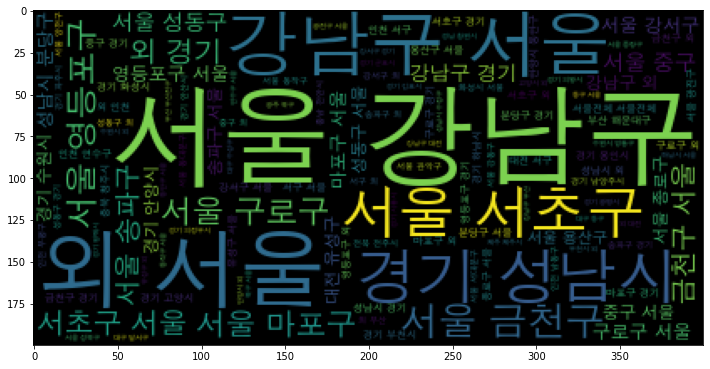

In [7]:
wc = WordCloud(font_path='../Library/Fonts/AppleGothic.ttf')
result = wc.generate(' '.join(tokens2))

plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

In [165]:
# 서울이 많네 -> 서울 어디가 많노 

In [8]:
tokens3 = tokenizer.tokenize(' '.join(df['category']))
counter3 = Counter(tokens3)
counter3.most_common()

[('Java,', 5492),
 ('쇼핑몰,', 5379),
 ('포토샵,', 4525),
 ('일러스트레이터,', 4111),
 ("['백엔드/서버개발',", 3896),
 ("'웹개발',", 3273),
 ('바이럴마케팅,', 3192),
 ("['소프트웨어개발,", 3110),
 ('솔루션,', 3075),
 ('웹프로그래머,', 2918),
 ("'프론트엔드',", 2727),
 ('오픈마켓,', 2631),
 ('HTML,', 2582),
 ('전자상거래,', 2509),
 ('온라인마케팅,', 2493),
 ('SI,', 2317),
 ('소프트웨어개발,', 2306),
 ('마케팅,', 2298),
 ('웹사이트운영,', 2265),
 ('유지보수,', 2056),
 ("['웹개발',", 2052),
 ('하드웨어,', 1992),
 ('MySQL,', 1983),
 ('마케팅기획,', 1867),
 ('jsp,', 1850),
 ('CSS,', 1830),
 ('웹UI,', 1795),
 ('웹기획,', 1776),
 ("'Java',", 1748),
 ('자바스크립트,', 1731),
 ('안드로이드,', 1727),
 ('Python,', 1726),
 ('소셜마케팅,', 1724),
 ("포토샵']", 1695),
 ('SM,', 1643),
 ('웹마케팅,', 1584),
 ('응용프로그래머,', 1581),
 ('키워드광고,', 1556),
 ('SQL,', 1538),
 ('Linux,', 1509),
 ('컨텐츠관리,', 1489),
 ("'C++',", 1442),
 ('MD,', 1432),
 ("['모바일앱개발,", 1428),
 ('광고기획,', 1421),
 ('모바일UI,', 1417),
 ('온라인MD,', 1413),
 ('아이폰,', 1405),
 ('게시판관리,', 1398),
 ("'유지보수',", 1393),
 ("UI·UX디자인']", 1346),
 ('영상편집,', 1337),
 ("Java']", 1325

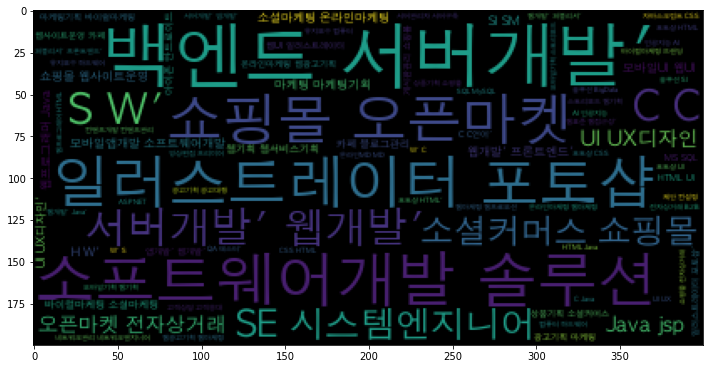

In [9]:
result = wc.generate(' '.join(tokens3))
plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

# 근무지 -> 서울 어디 동네가 많은지

In [10]:
place = df[df['work_place'].str.contains('서울') ]
place = place['work_place']

In [11]:
place2 = pd.DataFrame(place)

In [12]:
place2.replace(['서울', '외', '전체', '전지역'], '', regex=True, inplace=True)
place3 = place2['work_place']
len(place3)

30104

In [13]:
tokens4 = tokenizer.tokenize(' '.join(place3))
counter4 = Counter(tokens4)
counter4.most_common()

[('강남구', 7861),
 ('서초구', 3001),
 ('금천구', 2956),
 ('영등포구', 2109),
 ('구로구', 1912),
 ('마포구', 1804),
 ('송파구', 1439),
 ('성동구', 1409),
 ('중구', 1341),
 ('강서구', 1039),
 ('종로구', 730),
 ('용산구', 635),
 ('광진구', 270),
 ('동작구', 237),
 ('동대문구', 235),
 ('관악구', 227),
 ('양천구', 191),
 ('서대문구', 190),
 ('강동구', 190),
 ('중랑구', 188),
 ('성북구', 170),
 ('노원구', 102),
 ('은평구', 95),
 ('도봉구', 61),
 ('강북구', 54)]

In [14]:
type(counter4)

collections.Counter

In [36]:
# 타입이 개떡같아서 데이터 프레임으로 바까주기

df = pd.DataFrame.from_dict(counter4, orient='index').reset_index()
df.rename(columns={'index':'district', 0:'count'}, inplace=True)
df = df.sort_values(by='count' ,ascending=False)

In [37]:
df.set_index("district", inplace=True)
df.head()

,count
district,
강남구,7861
서초구,3001
금천구,2956
영등포구,2109
구로구,1912


In [17]:
df.describe()

,count
count,25.000000
mean,1137.840000
std,1668.770073
min,54.000000
25%,190.000000
50%,270.000000
75%,1439.000000
max,7861.000000


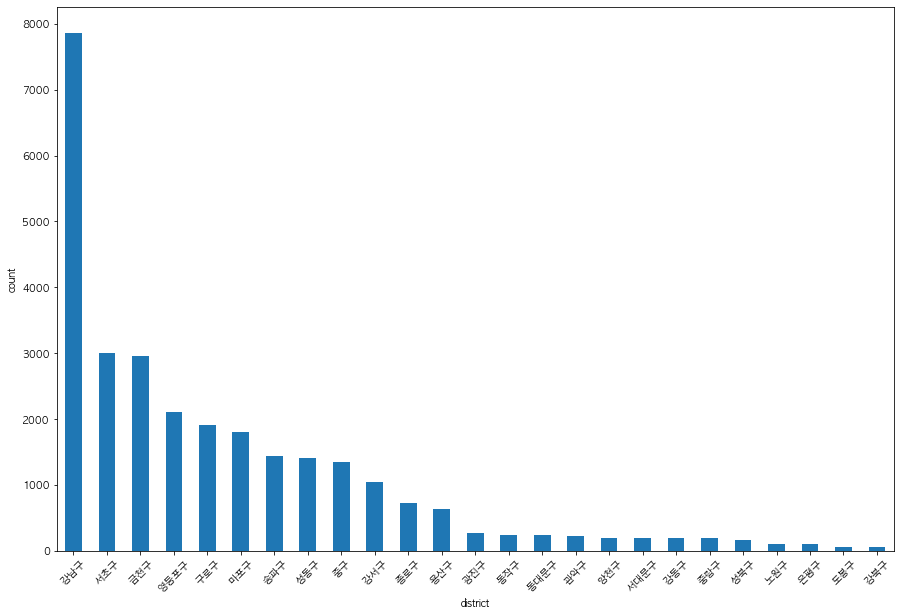

In [38]:
plt.figure(figsize=(15, 10))
df['count'].plot(kind="bar")
plt.xlabel('district')
plt.ylabel('count')
plt.xticks(rotation = 45)

plt.show()